In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

# Movshon lab - Blackrock Converter

In [2]:
from movshon_lab_to_nwb import MovshonBlackrockNWBConverter
from pynwb import NWBFile, NWBHDF5IO
from nwbwidgets import nwb2widget
from pathlib import Path
import yaml
import pprint

In [3]:
# Source data
base_path = Path('/home/luiz/storage/taufferconsulting/client_ben/project_movshon/data_blackrock/')
file_recording_raw = str(base_path / 'XX_LE_textures_20191128_002.ns6')
file_recording_processed = str(base_path / 'XX_LE_textures_20191128_002.ns3')
file_sorting = str(base_path / 'XX_LE_textures_20191128_002.nev')

source_data = dict(
    BlackrockRaw=dict(filename=file_recording_raw),
    BlackrockProcessed=dict(filename=file_recording_processed),
    BlackrockSorting=dict(
        filename=file_sorting,
        nsx_to_load=6
    )
)

# Initialize converter
converter = MovshonBlackrockNWBConverter(source_data=source_data)

# Get metadata from source data
metadata = converter.get_metadata()

# User-input metadata
metadata['NWBFile']['session_description'] = 'example conversion'

# Conversion options
conversion_options = converter.get_conversion_options()
conversion_options['BlackrockRaw'] = dict(
    write_as='raw', 
    es_key='ElectricalSeries_raw', 
    stub_test=True
)
conversion_options['BlackrockProcessed'] = dict(
    write_as='processed', 
    es_key='ElectricalSeries_processed', 
    stub_test=True
)


# Validate source, metadata and options
converter.validate_source(source_data)
converter.validate_metadata(metadata)
converter.validate_conversion_options(conversion_options)

# Run conversion
output_file = 'out_example_blackrock.nwb'

converter.run_conversion(
    metadata=metadata, 
    nwbfile_path=output_file, 
    save_to_file=True,
    overwrite=True,
    conversion_options=conversion_options
)

Source data is valid!
Source data is valid!
Metadata is valid!
conversion_options is valid!
conversion_options is valid!


/home/luiz/anaconda3/envs/env_movshon/lib/python3.7/site-packages/pynwb/file.py:753: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
/home/luiz/anaconda3/envs/env_movshon/lib/python3.7/site-packages/hdmf/common/table.py:415: UserWarning: An attribute 'name' already exists on DynamicTable 'electrodes' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  warn(msg)


Converting Blackrock raw traces...
Converting Blackrock processed traces...
NWB file saved at out_example_blackrock.nwb!


## Check NWB file with widgets

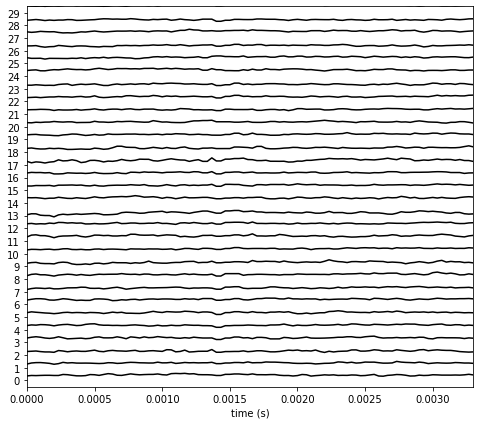

In [4]:
io = NWBHDF5IO(output_file, 'r')
nwbfile = io.read()
nwb2widget(nwbfile)